# Исследование индустрии компьютерных игр

В рамках проекта нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина «Стримчик».

В распоряжении данные до 2016 года. Нужно спланировать рекламную кампанию на 2017 год.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#количество пропусков в каждом столбце
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#количество явных дубликатов
data.duplicated().sum()

0

В 5 из 11 столбцов есть пропуски, их нужно обработать. Явных дубликатов в данных нет. Есть столбцы, в которых нужно изменить тип данных: YearofRelease, Criticscore, Userscore. Нужно привести названия столбцов в единый регистр.

### Подготовьте данные

**Замените названия столбцов (приведите к нижнему регистру);**

In [7]:
#Замените названия столбцов
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему**

In [8]:
#меняем тип данных на числовой
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast='integer')

In [9]:
# если errors='coerce', то некорректные значения принудительно заменяются на NaN
# тип данных менаяем на 'float'
data['user_score'] = pd.to_numeric(data['user_score'], 
                                   errors ='coerce', downcast='float')

- В 'year_of_release' тип данных с float64 заменили на int, так как столбец хранит данные о годах релиза, числа с плавоющей точкой тут ни к чему;
- Тип данных столбца 'critic_score' с float64 заменили на int, так как там целочисленные значения в пределах 100;
- Для 'user_score' нужет тип float, а не object, так как столбец хранит занчения в пределах 10


**Обработайте пропуски при необходимости**
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
 
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [10]:
# удаляем строки с пропусками в name
data = data[~data['name'].isna()]

#Заменяем пропуски на значение 'INDEFINED'
data['rating'] = data['rating'].fillna('INDEFINED')

In [12]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [13]:
data = data[~data['year_of_release'].isna()] 

- В 'name'(название игры) было два пропуска, их мы удаляем. Есть вероятность что просто еще не утвердили название игры, отсюда и пропуск;
- 'rating' содержит категориальные значения, пропуски в этом столбце заменили на значение 'INDEFINED', пропущенных значеий тут 6676;
- Для 'critic_score' и 'user_score', которые хранят такие данные как  оценка критиков (максимум 100) и  оценка пользователей (максимум 10), нашли и заменили пропуски медианным значением;
- 'year_of_release' строки с пропусками было решено удалить. Возможно год выпуска не определен или банально забыли его указать вот и причина возникновения пропусков;
- Аббревиатура 'tbd' спользуется если какая-то информация еще не определена или решение по вопросу не принято, для обработки этого значения в столбце 'user_score', значение 'tbd' принудительно заменили на NaN.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.4+ MB


In [15]:
data.isna().sum() 

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [16]:
data['rating'].value_counts()

INDEFINED    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец**

In [17]:
data['all_regions'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,INDEFINED,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,INDEFINED,31.38


В этой части проекта были подготовлены данные для дальнейших манипуляций, а именно:
- Изменены названия столбцов;
- Данные преобразованы в нужные типы;
- Обработаны пропуски;
- Посчитаны суммарные продажи по всем регионам.

### Проведите исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

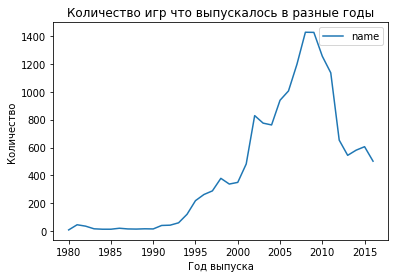

In [20]:
sss = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

sss.plot(y='name', title='Количество игр что выпускалось в разные годы')

plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

In [21]:
sss.sort_values(by='year_of_release', ascending=False).head(10)

,name
year_of_release,
2016.0,502
2015.0,606
2014.0,581
2013.0,544
2012.0,653
2011.0,1136
2010.0,1255
2009.0,1426
2008.0,1427


На графике видно что кривая начинаяет свой рост с 1990 года, вероятно рост обусловлен развитием технологий. Пик приходтся на 2008-2010 гг.
С 2010 начинаетя спад. Для дальнейшей работы можно не брать данные за все периоды.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

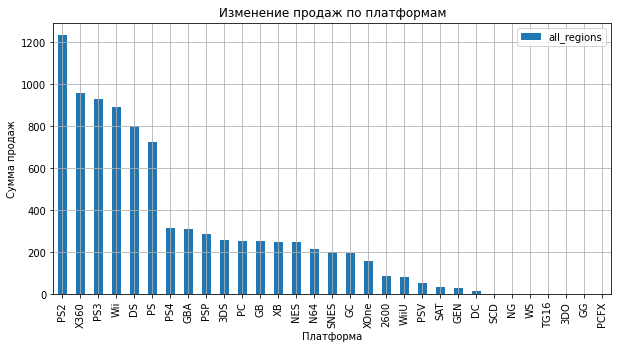

In [22]:
ddd = (data
       .pivot_table(index='platform', values='all_regions', aggfunc='sum')
       .sort_values(by='all_regions', ascending=False)
       .reset_index()
      )

ddd.plot(x='platform', y='all_regions', kind = 'bar', figsize=(10,5), grid=True, title='Изменение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

In [23]:
top_platform = ddd[:6]
top_platform

,platform,all_regions
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


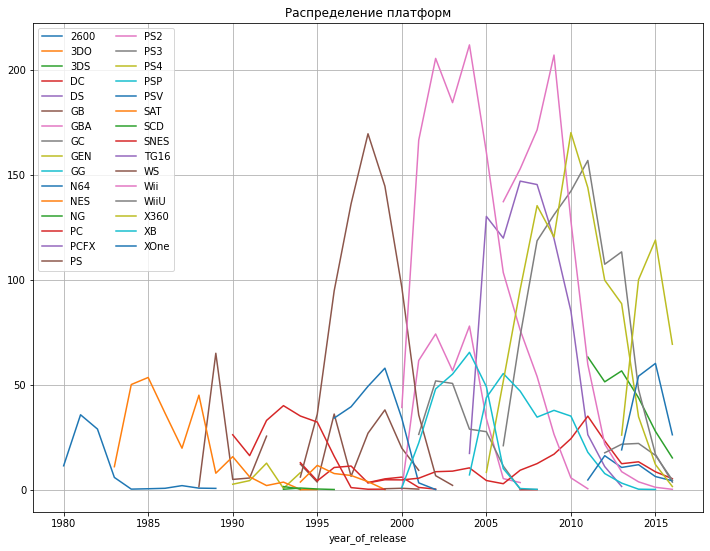

In [24]:
qw = (data
      .pivot_table(index='year_of_release', columns = 'platform', values='all_regions', aggfunc='sum')
      .plot(grid=True, figsize=(12, 9)))
plt.legend(bbox_to_anchor=[0, 1], loc='upper left', ncol=2)
plt.title('Распределение платформ')
plt.show()

In [26]:
for i in top_platform:
    ttt = data.pivot_table(index=['platform','year_of_release'], values='all_regions', aggfunc='sum')
ttt

all_regions
platform year_of_release             
2600     1980.0                 11.38
         1981.0                 35.68
         1982.0                 28.88
         1983.0                  5.84
         1984.0                  0.27
...                               ...
XB       2008.0                  0.18
XOne     2013.0                 18.96
         2014.0                 54.07
         2015.0                 60.14
         2016.0                 26.15

[238 rows x 1 columns]

Платформ с наибольшими суммарными продажами шесть - это PS2, X360, PS3, Wii, DS, PS. Срок жизни популярных платформ находятся в промежутках от 9 до 11 лет. 

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

In [27]:
data = data[data['year_of_release'] >= 2014]

Актуальный период на мой взгляд, для прогноза на 2017 год это период с 2014 года включительно.

**Не учитывайте в работе данные за предыдущие годы.**

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Text(0.5, 1.0, 'Диаграмма распределения платформ во всех регионах')

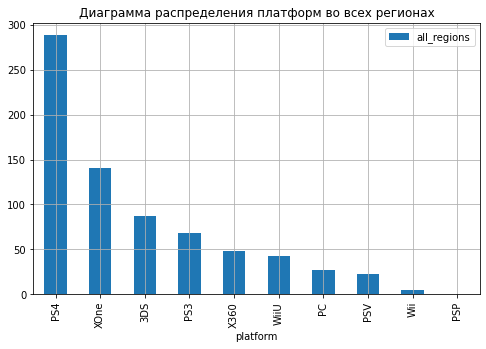

In [28]:
qwq = data.pivot_table(index=['platform'], values='all_regions',
                       aggfunc='sum').sort_values(by='all_regions', ascending=False)

qwq.plot(kind='bar',grid=True, figsize=(8, 5))
plt.title('Диаграмма распределения платформ во всех регионах')

In [29]:
qwq.sort_values(by='all_regions', ascending=False)

,all_regions
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Топ 3 лидеров по продажам это: PS4, XOne, 3DS. Меньшая активность у PSP, Wii, PSV и PC

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

In [30]:
data.groupby('platform')['all_regions'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


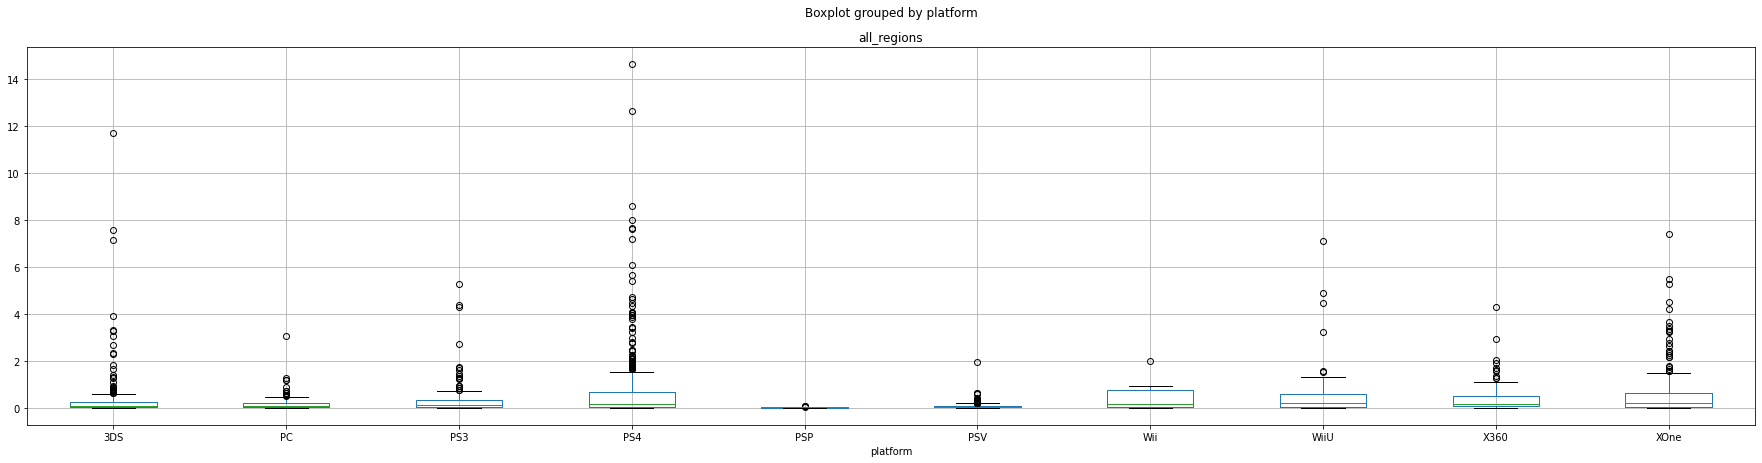

In [31]:
data.boxplot(column='all_regions', by='platform', figsize=(30,7))
plt.show()

(0.0, 2.0)

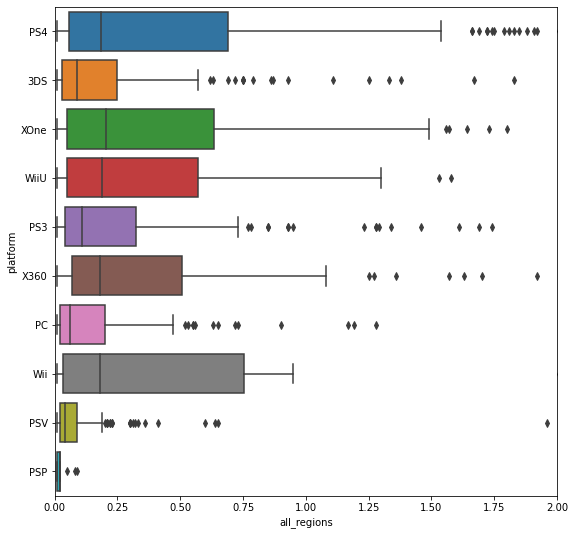

In [32]:
plt.figure(figsize=(9, 9))
sns.boxplot(y="platform", x="all_regions",data=data, orient="h")
plt.xlim(0, 2)

В выборке 10 платформ. На грфике видны популярные платформы ( их продажи выше 6 млн долларов), платформа с наиболее низкоим значением - PSP, максимальное значение у PS4

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

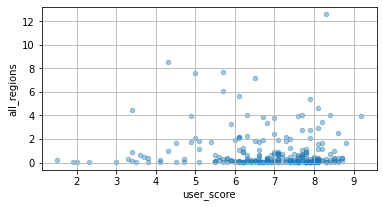

0.10411505493850104

In [33]:
data_ps4 = (data
            .query('(platform == "PS4") and (user_score > 0)')
            .plot(x='user_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6,3), grid=True)
           )
plt.show()
data_ps4 = data[data['platform']=='PS4']
data_ps4['user_score'].corr(data_ps4['all_regions'])

Корреляция 0.1 - очень слабая взаимосвязь

Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. В данном случае 'user_score' и 'all_regions' корреляция 0.1 - очень слабая взаимосвязь

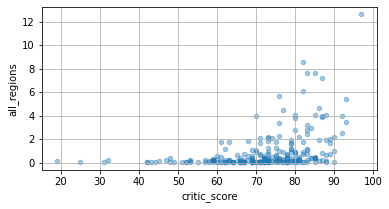

0.2108468533672136

In [34]:
data_ps4 = (data
            .query('(platform == "PS4") and (critic_score > 0)')
            .plot(x='critic_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6, 3), grid=True)
           )
plt.show()

data_ps4 = data[data['platform']=='PS4']
data_ps4['critic_score'].corr(data_ps4['all_regions'])

Корреляция равна 0.2, это значит что между 'critic_score' и 'all_regions' есть не сильно выраженная взаимосвязь.

**Соотнесите выводы с продажами игр на других платформах.**

In [35]:
#воспользуемся переменной которая хранит список платформ начиная с 2014 года
qwq.groupby('platform')['all_regions'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,1.0,86.68,NaN,86.68,86.68,86.68,86.68,86.68
PC,1.0,27.05,NaN,27.05,27.05,27.05,27.05,27.05
PS3,1.0,68.18,NaN,68.18,68.18,68.18,68.18,68.18
PS4,1.0,288.15,NaN,288.15,288.15,288.15,288.15,288.15
PSP,1.0,0.36,NaN,0.36,0.36,0.36,0.36,0.36
PSV,1.0,22.40,NaN,22.40,22.40,22.40,22.40,22.40
Wii,1.0,5.07,NaN,5.07,5.07,5.07,5.07,5.07
WiiU,1.0,42.98,NaN,42.98,42.98,42.98,42.98,42.98
X360,1.0,48.22,NaN,48.22,48.22,48.22,48.22,48.22


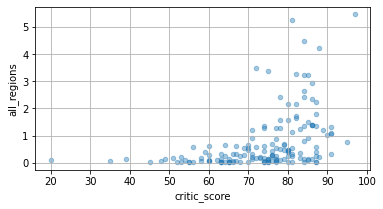

0.27147591419241845

In [36]:
data_xone = (data
            .query('(platform == "XOne") and (critic_score > 0)')
            .plot(x='critic_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6, 3), grid=True)
           )
plt.show()

data_xone = data[data['platform']=='XOne']
data_xone['critic_score'].corr(data_xone['all_regions'])

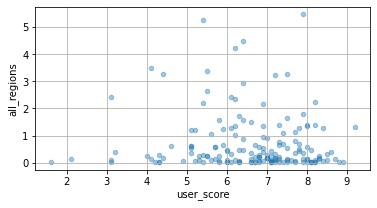

0.10671381873447282

In [37]:
data_xone = (data
            .query('(platform == "XOne") and (user_score > 0)')
            .plot(x='user_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6, 3), grid=True)
           )
plt.show()

data_xone = data[data['platform']=='XOne']
data_xone['user_score'].corr(data_xone['all_regions'])

Для платформы XOne:
- Корреляция между отзывами критиков и продажами 0.27 - слабая связь
- Корреляция между отзывами пользователей и продажами 0.1 - очень слабая связь

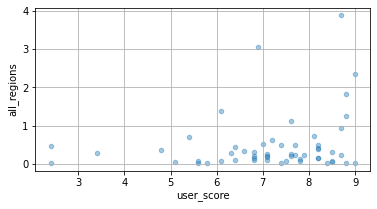

0.05328739657697874

In [38]:
data_3ds = (data
            .query('(platform == "3DS") and (user_score > 0)')
            .plot(x='user_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6, 3), grid=True)
           )
plt.show()

data_3ds = data[data['platform']=='3DS']
data_3ds['user_score'].corr(data_3ds['all_regions'])

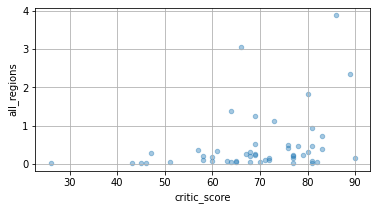

0.052992079088970565

In [39]:
data_3ds = (data
            .query('(platform == "3DS") and (critic_score > 0)')
            .plot(x='critic_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6, 3), grid=True)
           )
plt.show()

data_3ds = data[data['platform']=='3DS']
data_3ds['critic_score'].corr(data_3ds['all_regions'])

Для платформы 3DS:
- Корреляция между отзывами критиков и продажами 0.05 - отсутствует взаимосвязь
- Корреляция между отзывами пользователей и продажами 0.05 - отсутствует взаимосвязь

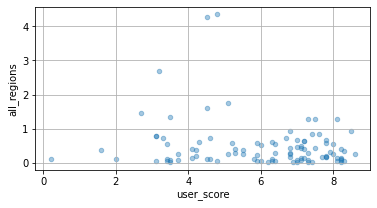

0.2075281404209758

In [40]:
data_ps3 = (data
            .query('(platform == "PS3") and (user_score > 0)')
            .plot(x='user_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6,3), grid=True)
           )
plt.show()
data_ps3 = data[data['platform']=='PS3']
data_ps3['user_score'].corr(data_ps3['all_regions'])

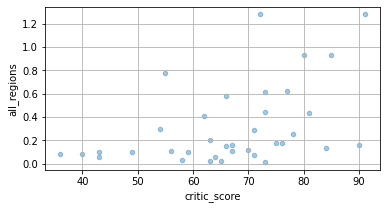

0.023612142901272865

In [41]:
data_ps3 = (data
            .query('(platform == "PS3") and (critic_score > 0)')
            .plot(x='critic_score', y='all_regions', kind='scatter', alpha=0.4, figsize=(6,3), grid=True)
           )
plt.show()
data_ps3 = data[data['platform']=='PS3']
data_ps3['critic_score'].corr(data_ps3['all_regions'])

Для платформы PS3:

- Корреляция между отзывами критиков и продажами 0.2 - очень слабая взаимосвязь
- Корреляция между отзывами пользователей и продажами 0.2 - очень слабая взаимосвязь

Для сравнения были взяты следующие платформы с наибольшим числом продаж: PS3, 3DS, XOne, PS4.

- У всех 4 платформ взаимосвясь между продажами и оценками пользователей очень слабая или отсутствует вовсе.

- У XOne, PS3 как и у PS4 есть слабая взаимосвязь между продажами и оценками критиков, у 3DS она отсутствует


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

(0.0, 2.0)

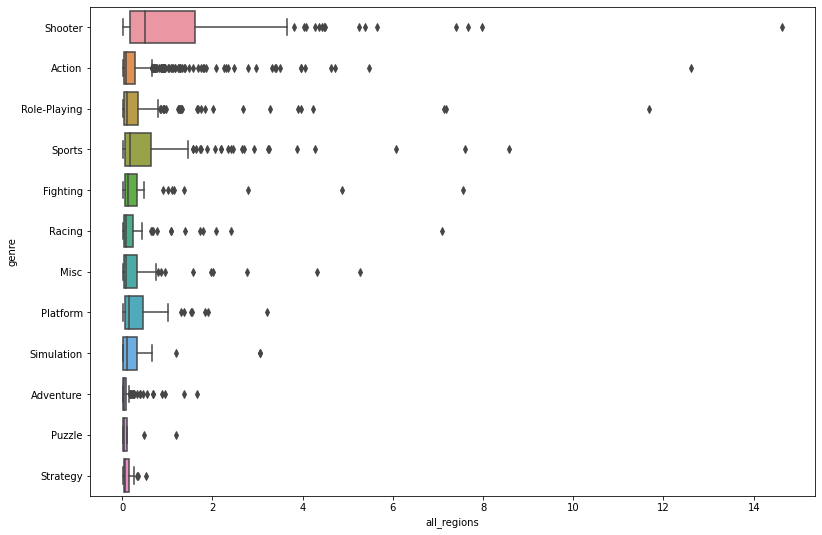

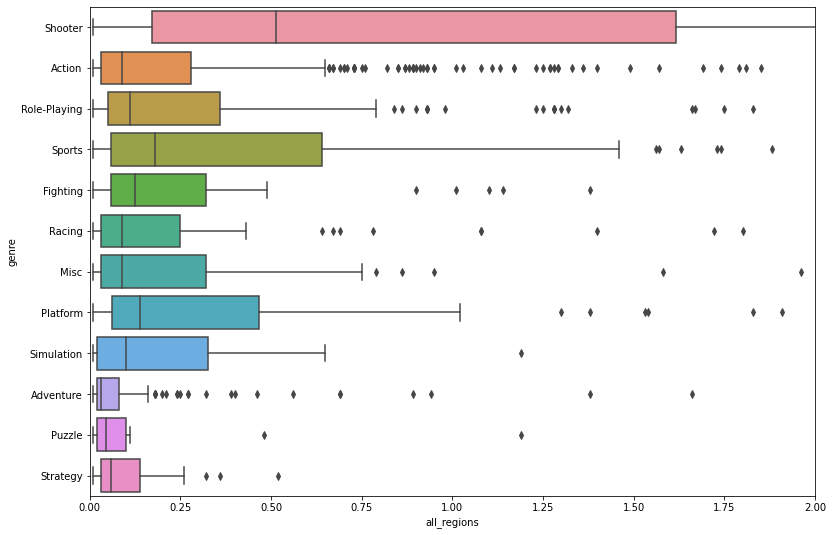

In [42]:
plt.figure(figsize=(13, 9))
sns.boxplot(y="genre", x="all_regions",data=data, orient="h")

plt.figure(figsize=(13, 9))
sns.boxplot(y="genre", x="all_regions",data=data, orient="h")
plt.xlim(0, 2)

Топ 3 жанра:
- Шутер, у жанра наибольшее значение 
- Спорт
- Платформер

Начиная с 2014 года жанры: Adventure, Puzzle,Strategy,  не пользуются популярностью

**Вывод**

В процессе исследовательского анализа данных были выполнены следующие шаги:
- Были найдены платформы с наибольшими суммарными продажами и построено распределение по годам;
- В качестве актуального периода взяты года с 2014;
- Выявлены платформы которые лидируют по продажам, растут или падают;
- Выявлено взаимосвясь между продажами и оценками пользователей/оценками критиков и прочее

### Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

Text(0.5, 1.0, 'Продажи в Северной Америке')

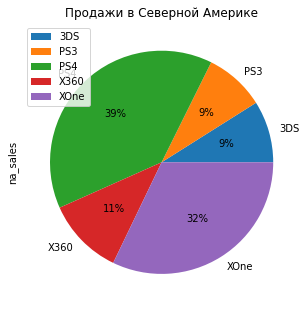

In [44]:
#продажи в Северной Америке (миллионы проданных копий)
na = (data
      .query('year_of_release >= 2014')
       .pivot_table(index='platform', values='na_sales', aggfunc='sum')
       .sort_values(by='na_sales', ascending=False)
       .head(5)
      )

na.groupby(['platform']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(5,6))

plt.title('Продажи в Северной Америке')

Text(0.5, 1.0, 'Продажи в Европе')

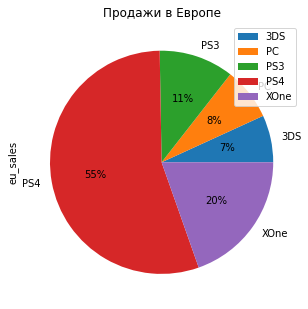

In [45]:
#продажи в Европе (миллионы проданных копий)
eu = (data
      .query('year_of_release >= 2014')
       .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
       .sort_values(by='eu_sales', ascending=False)
       .head(5)
      )

eu.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', 
                                    autopct='%1.0f%%', figsize=(5,6))

plt.title('Продажи в Европе')

Text(0.5, 1.0, 'Продажи в Японии')

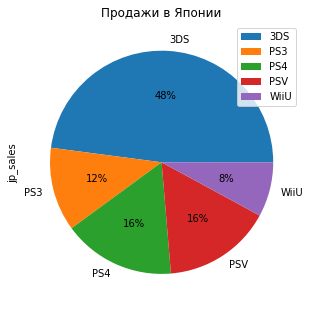

In [46]:
#продажи в Японии (миллионы проданных копий)
jp = (data
      .query('year_of_release >= 2014')
       .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
       .sort_values(by='jp_sales', ascending=False)
       .head(5)
      )

jp.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', 
                                    autopct='%1.0f%%', figsize=(5, 6))

plt.title('Продажи в Японии')

Text(0.5, 1.0, 'Продажи в других странах')

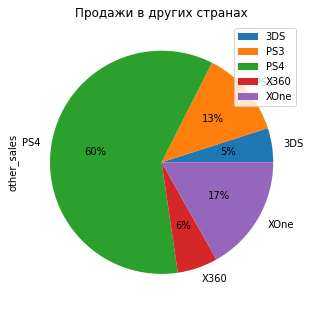

In [47]:
#продажи в других странах 
os = (data
      .query('year_of_release >= 2014')
       .pivot_table(index='platform', values='other_sales', aggfunc='sum')
       .sort_values(by='other_sales', ascending=False)
       .head(5)
      )

os.groupby(['platform']).sum().plot(kind='pie', y='other_sales', 
                                    autopct='%1.0f%%', figsize=(5,6))

plt.title('Продажи в других странах')

В Северной Америке(39) и в Европе(55%) наиболее популярной платформай явлется PS4, в Северной Америке с ней конкурирует XOne.
В Японии преобладает 3DS - 48%, тут пользователей PS4 в два раза меньше - 16%. У PS4 продажи в других странах достигают 60% а вот доля XOne всего 17%

**Самые популярные жанры (топ-5). Поясните разницу.**

Text(0.5, 1.0, 'Жанры топ-5 в Северной Америке')

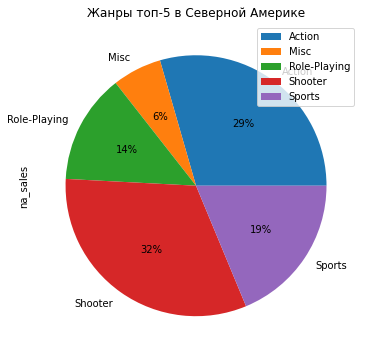

In [48]:
#в Северной Америке
na_g = (data.query('year_of_release >= 2014')
       .pivot_table(index='genre', values='na_sales', aggfunc='sum')
       .sort_values(by='na_sales', ascending=False).head(5)
      )

na_g.groupby(['genre']).sum().plot(kind='pie', 
                                   y='na_sales', autopct='%1.0f%%', figsize=(6,6))

plt.title('Жанры топ-5 в Северной Америке')

Самые популярные жанры (топ-5) в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc.
 Большая доля приходится на жанры шутер и экшен 32 и 29 процентов

Text(0.5, 1.0, 'Жанры топ-5 в Европе')

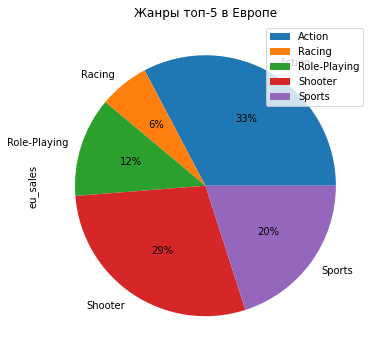

In [49]:
#в Европе 
eu_g = (data
        .query('year_of_release >= 2014')
       .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
       .sort_values(by='eu_sales', ascending=False).head(5)
      )

eu_g.groupby(['genre']).sum().plot(kind='pie', y='eu_sales',
                                   autopct='%1.0f%%', figsize=(6,6))

plt.title('Жанры топ-5 в Европе')

Самые популярные жанры (топ-5) в Европе: Action, Shooter, Sports, Role-Playing, Racing.
Популярностью пользуются жанры экшен и шутер

Text(0.5, 1.0, 'Жанры топ-5 в Японии')

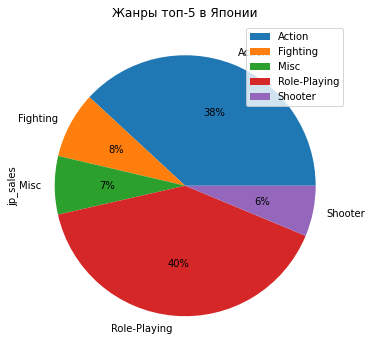

In [50]:
#в Японии
jp_g = (data.query('year_of_release >= 2014')
       .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
       .sort_values(by='jp_sales', ascending=False).head(5)
      )

jp_g.groupby(['genre']).sum().plot(kind='pie', y='jp_sales', 
                                   autopct='%1.0f%%', figsize=(6,6))

plt.title('Жанры топ-5 в Японии')

Самые популярные жанры (топ-5) в Японии: Role-Playing, Action, Fighting, Misc, Shooter. Наиболее популярные жанры Role-Playing, Action.

Text(0.5, 1.0, 'Жанры топ-5 в других странах')

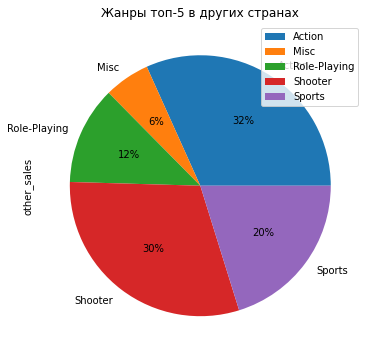

In [51]:
#в других странах
os_g = (data.query('year_of_release >= 2014')
       .pivot_table(index='genre', values='other_sales', aggfunc='sum')
       .sort_values(by='other_sales', ascending=False).head(5)
      )

os_g.groupby(['genre']).sum().plot(kind='pie', y='other_sales', 
                                   autopct='%1.0f%%', figsize=(6,6))

plt.title('Жанры топ-5 в других странах')

По продажам в других странах лидируют жанры: экшен, шутер, спорт, ролевая игра и misc. Лидируют два жанра экшем и шутер

В Северной Америке и в Европе у игроков схожие жанровые предпочтения. Популярные жанры в рейтинге Японии отличаются от Америки и Европы. Если жанр Shooter в других случаях занимает лидирующие позиции, то в Японии он занимает 5-е место в топе.
Жанр Экшен популярен во всех регионах


**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Text(0.5, 1.0, 'График влияния ESRB на продажи в Северной Америке')

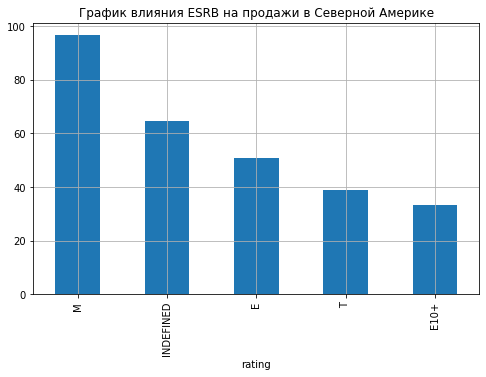

In [52]:
# в Северной Америке
esrb_na = (data
           .groupby('rating')['na_sales'].sum().sort_values(ascending=False)
           .plot(x='rating', y='na_sales', kind='bar', figsize=(8,5), grid=True)
          ) 

plt.title('График влияния ESRB на продажи в Северной Америке')

В Северной Америке преобладает рейтинг "М", далее игры чей возрастной рейтинг не определен.

Text(0.5, 1.0, 'График влияния ESRB на продажи в Японии')

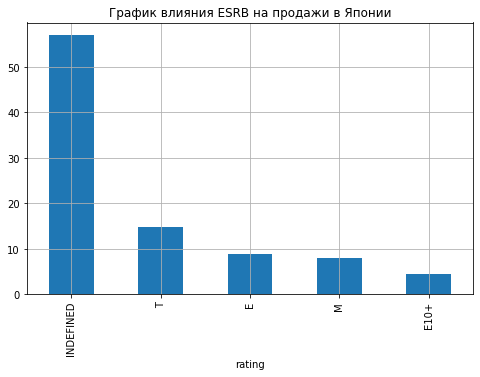

In [53]:
# в Японии
esrb_jp = (data
           .groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
           .plot(x='rating', y='jp_sales', kind='bar', figsize=(8,5), grid=True)
          ) 

plt.title('График влияния ESRB на продажи в Японии')

В Японии преобладают игры где не определена возрастная категория

Text(0.5, 1.0, 'График влияния ESRB на продажи в Европе')

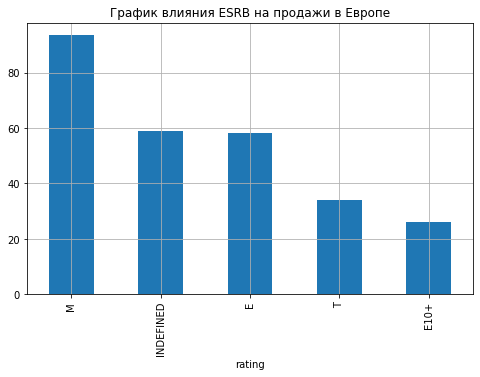

In [54]:
# в Европе
esrb_eu = (data
           .groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
           .plot(x='rating', y='eu_sales', kind='bar', figsize=(8,5), grid=True)
          ) 

plt.title('График влияния ESRB на продажи в Европе')

В Европе преобладают игры в возрастной категории "М"

Text(0.5, 1.0, 'График влияния ESRB на продажи в других странах')

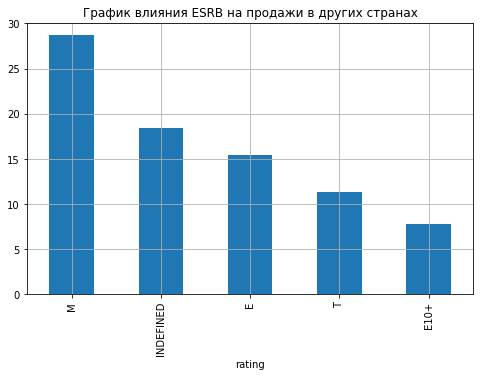

In [55]:
esrb_os = (data
           .groupby('rating')['other_sales'].sum().sort_values(ascending=False)
           .plot(x='rating', y='other_sales', kind='bar', figsize=(8,5), grid=True)
          ) 

plt.title('График влияния ESRB на продажи в других странах')

Возрастная категория: Старше 17

**Для Японии:**

 - Наиболее популярной платформой считается 3DS - которая занимает 48% рынка. 
 - Так как в Японии не придерживаются рейтинга ESRB, то сдесь не определена возрастная категория, 
 - Наиболее популярны жанры Role-Playing, Action.


**Для Европы:**

 - Платформа PS4 занимает 55% рынка
 - Жанры экшен и шутер- 33% и 29%
 - Возрастная категория: Старше 17 

**Для Северной Америки:**

 - Платформы: PS4 и XOne
 - Наиболее популярны жанры: Экшен и шутер
 - Возрастная категория: Старше 17

### Проверьте гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Проверка гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые":
- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [56]:
xbox_data = data.query('(platform == "XOne") and (user_score > 0)')['user_score']
pc_data = data.query('(platform == "PC") and (user_score > 0)')['user_score']

In [58]:
# Комментарий ревьюера 3
xbox_data, pc_data

(165      7.9
 179      5.4
 242      6.4
 270      6.2
 373      4.1
         ... 
 16544    6.8
 16597    6.0
 16630    8.2
 16643    6.6
 16660    6.7
 Name: user_score, Length: 165, dtype: float32,
 458      3.9
 1530     5.4
 1730     7.9
 2303     5.7
 2784     5.9
         ... 
 16456    8.3
 16463    6.8
 16509    7.9
 16518    1.4
 16692    7.6
 Name: user_score, Length: 122, dtype: float32)

In [59]:
# Комментарий ревьюера 2
xbox_data.min(), pc_data.min()

(1.6, 1.4)

In [60]:
xbox_data.mean()

6.5945444

In [61]:
pc_data.mean()

6.298361

In [62]:
# уровень стат. значимости
alpha = 0.01

results = st.ttest_ind(xbox_data, pc_data, equal_var=False)
print('p-значение:', results.pvalue)


# сравнение p-значение с alpha
if results.pvalue < alpha:   
    print('Отвергаем нулевую гипотезу')    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601545900050317
Не получилось отвергнуть нулевую гипотезу


Подтвердили нулевую гипотезу H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Проверка гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"
- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [63]:
action_data = data.query('(genre == "Action") and (user_score > 0)')['user_score']

sports = data.query('(genre == "Sports") and (user_score > 0)')['user_score']

In [65]:
# Комментарий ревьюера 3
action_data, sports

(42       8.3
 165      7.9
 231      8.1
 295      6.3
 304      4.9
         ... 
 16544    6.8
 16597    6.0
 16652    8.5
 16660    6.7
 16692    7.6
 Name: user_score, Length: 297, dtype: float32,
 77       4.3
 94       5.0
 143      5.7
 264      4.5
 314      6.7
         ... 
 16120    6.3
 16142    8.8
 16146    6.9
 16518    1.4
 16643    6.6
 Name: user_score, Length: 127, dtype: float32)

In [66]:
action_data.mean()

6.760606

In [67]:
sports.mean()

5.225197

In [68]:
# уровень стат. значимости
alpha = 0.01

results = st.ttest_ind(action_data, sports, equal_var=False)
print('p-значение:', results.pvalue)


# сравнение p-значение с alpha
if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')   
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825638224397033e-14
Отвергаем нулевую гипотезу


Подтвердили альтернативную гипотезу H1: Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы воспользовались методом: scipy.stats.ttest_1samp(). Так как в обоих случаях мы проверили двустороннюю гипотезу о равенстве двух совокупностей.
В таком слуячае Н0: они равны, Н1: различаются. Различия могут быть как большую так и в меньшу сторону.

###  Общий вывод

В процессе работы были выполнены следующие шаги:
- Данные преобразованы в нужные типы, обработаны пропуски, заменены названия столбцов;
- Выбраны платформы с наибольшими суммарными продажами, построены распределения по годам. Выбран актульный период (с 2014) для прогназа на 2017 год, рассмотрены платформы что лидируют по продажам, растут или падают. Изучено влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков;
- Составлен портрет пользователя для следующих регионов: NA, EU, JP.
- Проверены две гипотезы: 
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action и Sports разные.


**Вывод:**
 Есть три фактора - это платформа, жанр, возрастноя категрия.

Для Европы:
 - Платформа PS4 занимает 55% рынка
 - Жанры экшен и шутер- 33% и 29%
 - Возрастная категория: Старше 17 

Для Японии:
 - Наиболее популярной платформой считается 3DS - которая занимает 48% рынка. 
 - Так как в Японии не придерживаются рейтинга ESRB, то сдесь не определена возрастная категория, 
 - Наиболее популярны жанры Role-Playing, Action.

Для Северной Америки:
 - Платформы: PS4 и XOne
 - Наиболее популярны жанры: Экшен и шутер
 - Возрастная категория: Старше 17

Для других регионов:

- Платформы: PS4 - 60%
- Наиболее популярны жанры: Экшен и шутер
- Возрастная категория: Старше 17

**Кампания на 2017 год:**
- Возрастная категория: Старше 17;
- Игры для платформ: PS4, XOne, 3DS;
- Игры в жанре: экшен, шутер, ролевые и спорт.